# **Regresión Lineal utilizando la IA**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'red-wine-quality-cortez-et-al-2009' dataset.
Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009



# **1. Lectura del conjunto de datos**

**Prompt:**
> Lee el archivo "/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv" en un datafram



In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# **2. Análisis Exploratorio**

# **Prompt**
> Grafica la distribución de la variable "Quality" del dataset

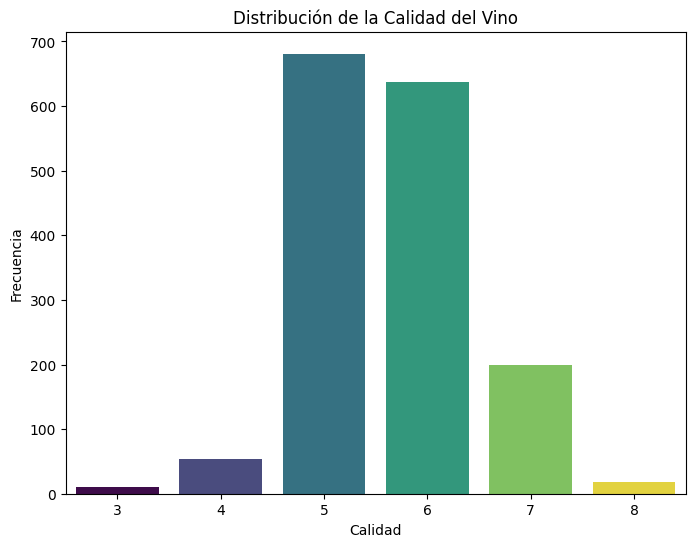

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, hue='quality', palette='viridis', legend=False)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# **Prompt**
> Crea un grafico de bigotes entre la variable Alcohool y Quality del dataset

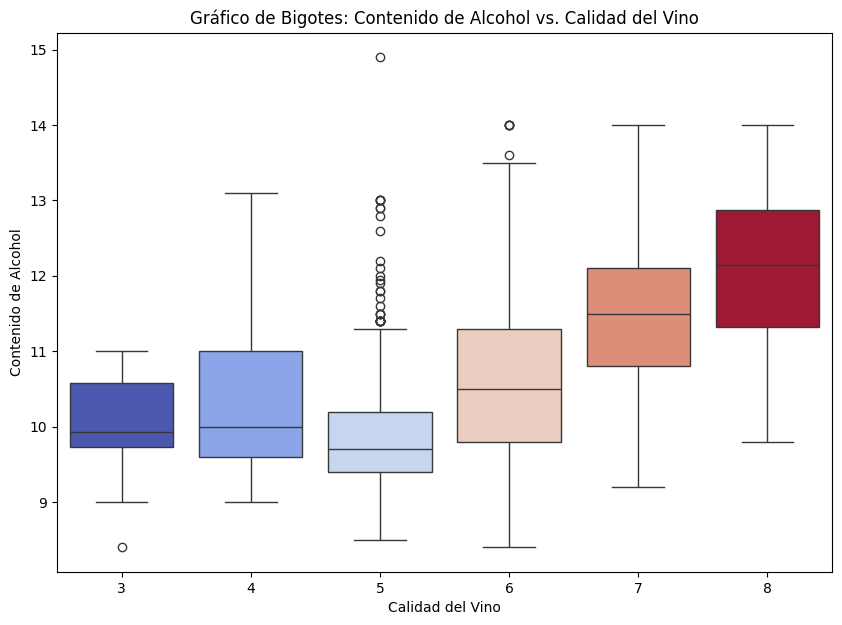

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(x='quality', y='alcohol', data=df, hue='quality', palette='coolwarm', legend=False)
plt.title('Gráfico de Bigotes: Contenido de Alcohol vs. Calidad del Vino')
plt.xlabel('Calidad del Vino')
plt.ylabel('Contenido de Alcohol')
plt.show()

# **Prompt**
> Crea un grafico de bigotes entre la variable Fixed Acidity y Quality del dataset

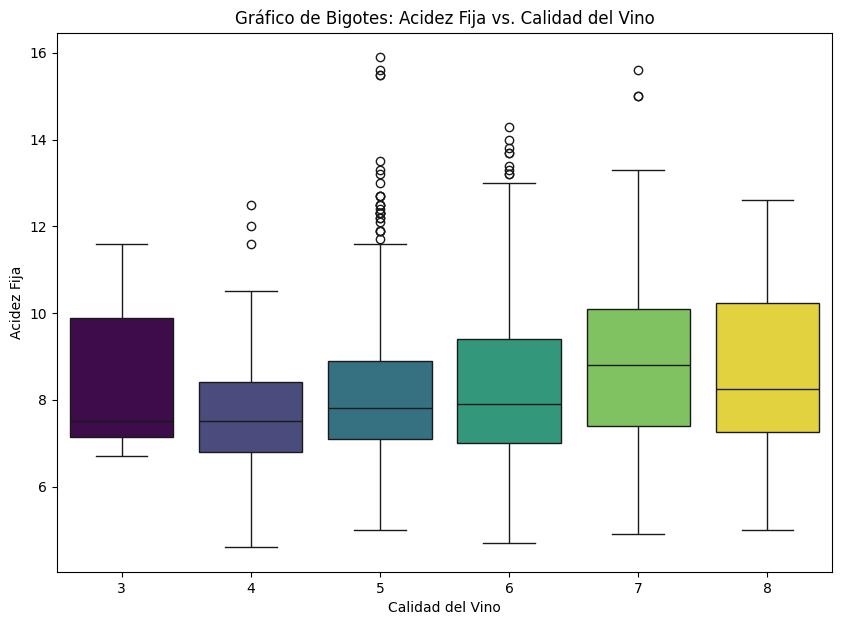

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(x='quality', y='fixed acidity', data=df, hue='quality', palette='viridis', legend=False)
plt.title('Gráfico de Bigotes: Acidez Fija vs. Calidad del Vino')
plt.xlabel('Calidad del Vino')
plt.ylabel('Acidez Fija')
plt.show()

# **Prompt**
> Crea la matriz de correlación del conjunto de datos

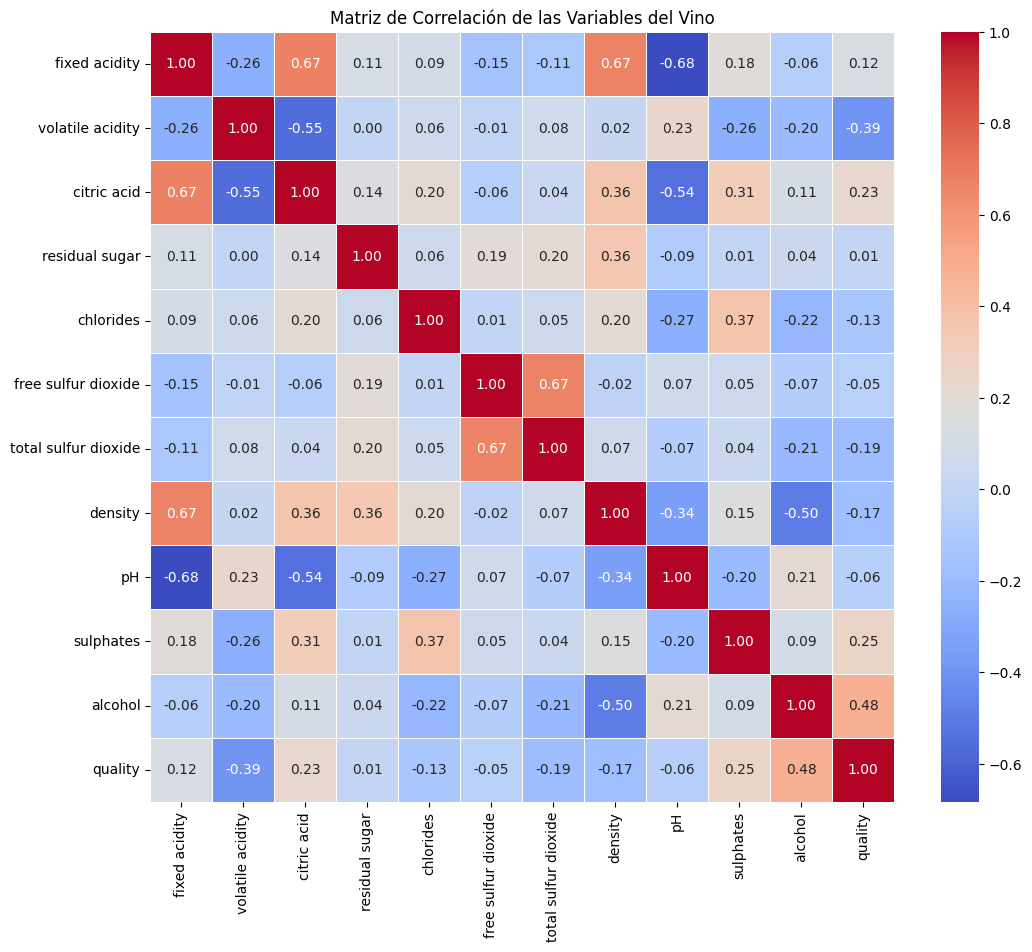

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de las Variables del Vino')
plt.show()

# **3. Implementación de Regresión Lineal**

# **Prompt**
> Divide el dataset en los subset train (70%) y test (30%)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1) # Features
y = df['quality'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (1119, 11)
Dimensiones de X_test: (480, 11)
Dimensiones de y_train: (1119,)
Dimensiones de y_test: (480,)


# **Prompt**
> Implementa regresion lineal utilizando la libreria scikitlearn sobre el conjunto de datos de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("Modelo de Regresión Lineal entrenado con éxito.")

Modelo de Regresión Lineal entrenado con éxito.


# **Prompt**
> Realiza una evaluación del modelo sobre el subconjunto de prueba

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.5134
Mean Squared Error (MSE): 0.4112
Root Mean Squared Error (RMSE): 0.6413
R-squared (R2) Score: 0.3514


# **Prompt**
> Realiza una predicción con un dato de prueba. Genera una interfaz para que el usuario introduzca los valores de las variables predictoras

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Get feature names from X_train
feature_names = X_train.columns

# Create a dictionary to hold the input widgets
input_widgets = {}
for feature in feature_names:
    input_widgets[feature] = widgets.FloatText(
        value=X_train[feature].mean(), # Pre-fill with mean for convenience
        description=feature.replace('_', ' ').title() + ':',
        disabled=False
    )

# Create a button for prediction
predict_button = widgets.Button(description="Predecir Calidad")
output = widgets.Output()

# Function to handle button click
def on_predict_button_clicked(b):
    with output:
        clear_output()
        try:
            # Get input values from widgets
            input_data = {feature: input_widgets[feature].value for feature in feature_names}

            # Convert to DataFrame, ensuring correct order of columns
            input_df = pd.DataFrame([input_data], columns=feature_names)

            # Make prediction
            prediction = model.predict(input_df)

            print(f"El modelo predice una calidad de vino de: {prediction[0]:.2f}")
        except Exception as e:
            print(f"Error al realizar la predicción: {e}")

# Attach the function to the button click event
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
print("Introduce los valores de las variables predictoras:")
display(widgets.VBox(list(input_widgets.values()) + [predict_button, output]))

Introduce los valores de las variables predictoras:
